<a href="https://colab.research.google.com/github/bustercherries/demo-repo/blob/main/Kopia_notatnika_CV_intro_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What do you know about Data Science?

Icebreaker:

*   Collecting input for [dall-e](https://huggingface.co/spaces/dalle-mini/dalle-mini)
*   https://www.whichfaceisreal.com/






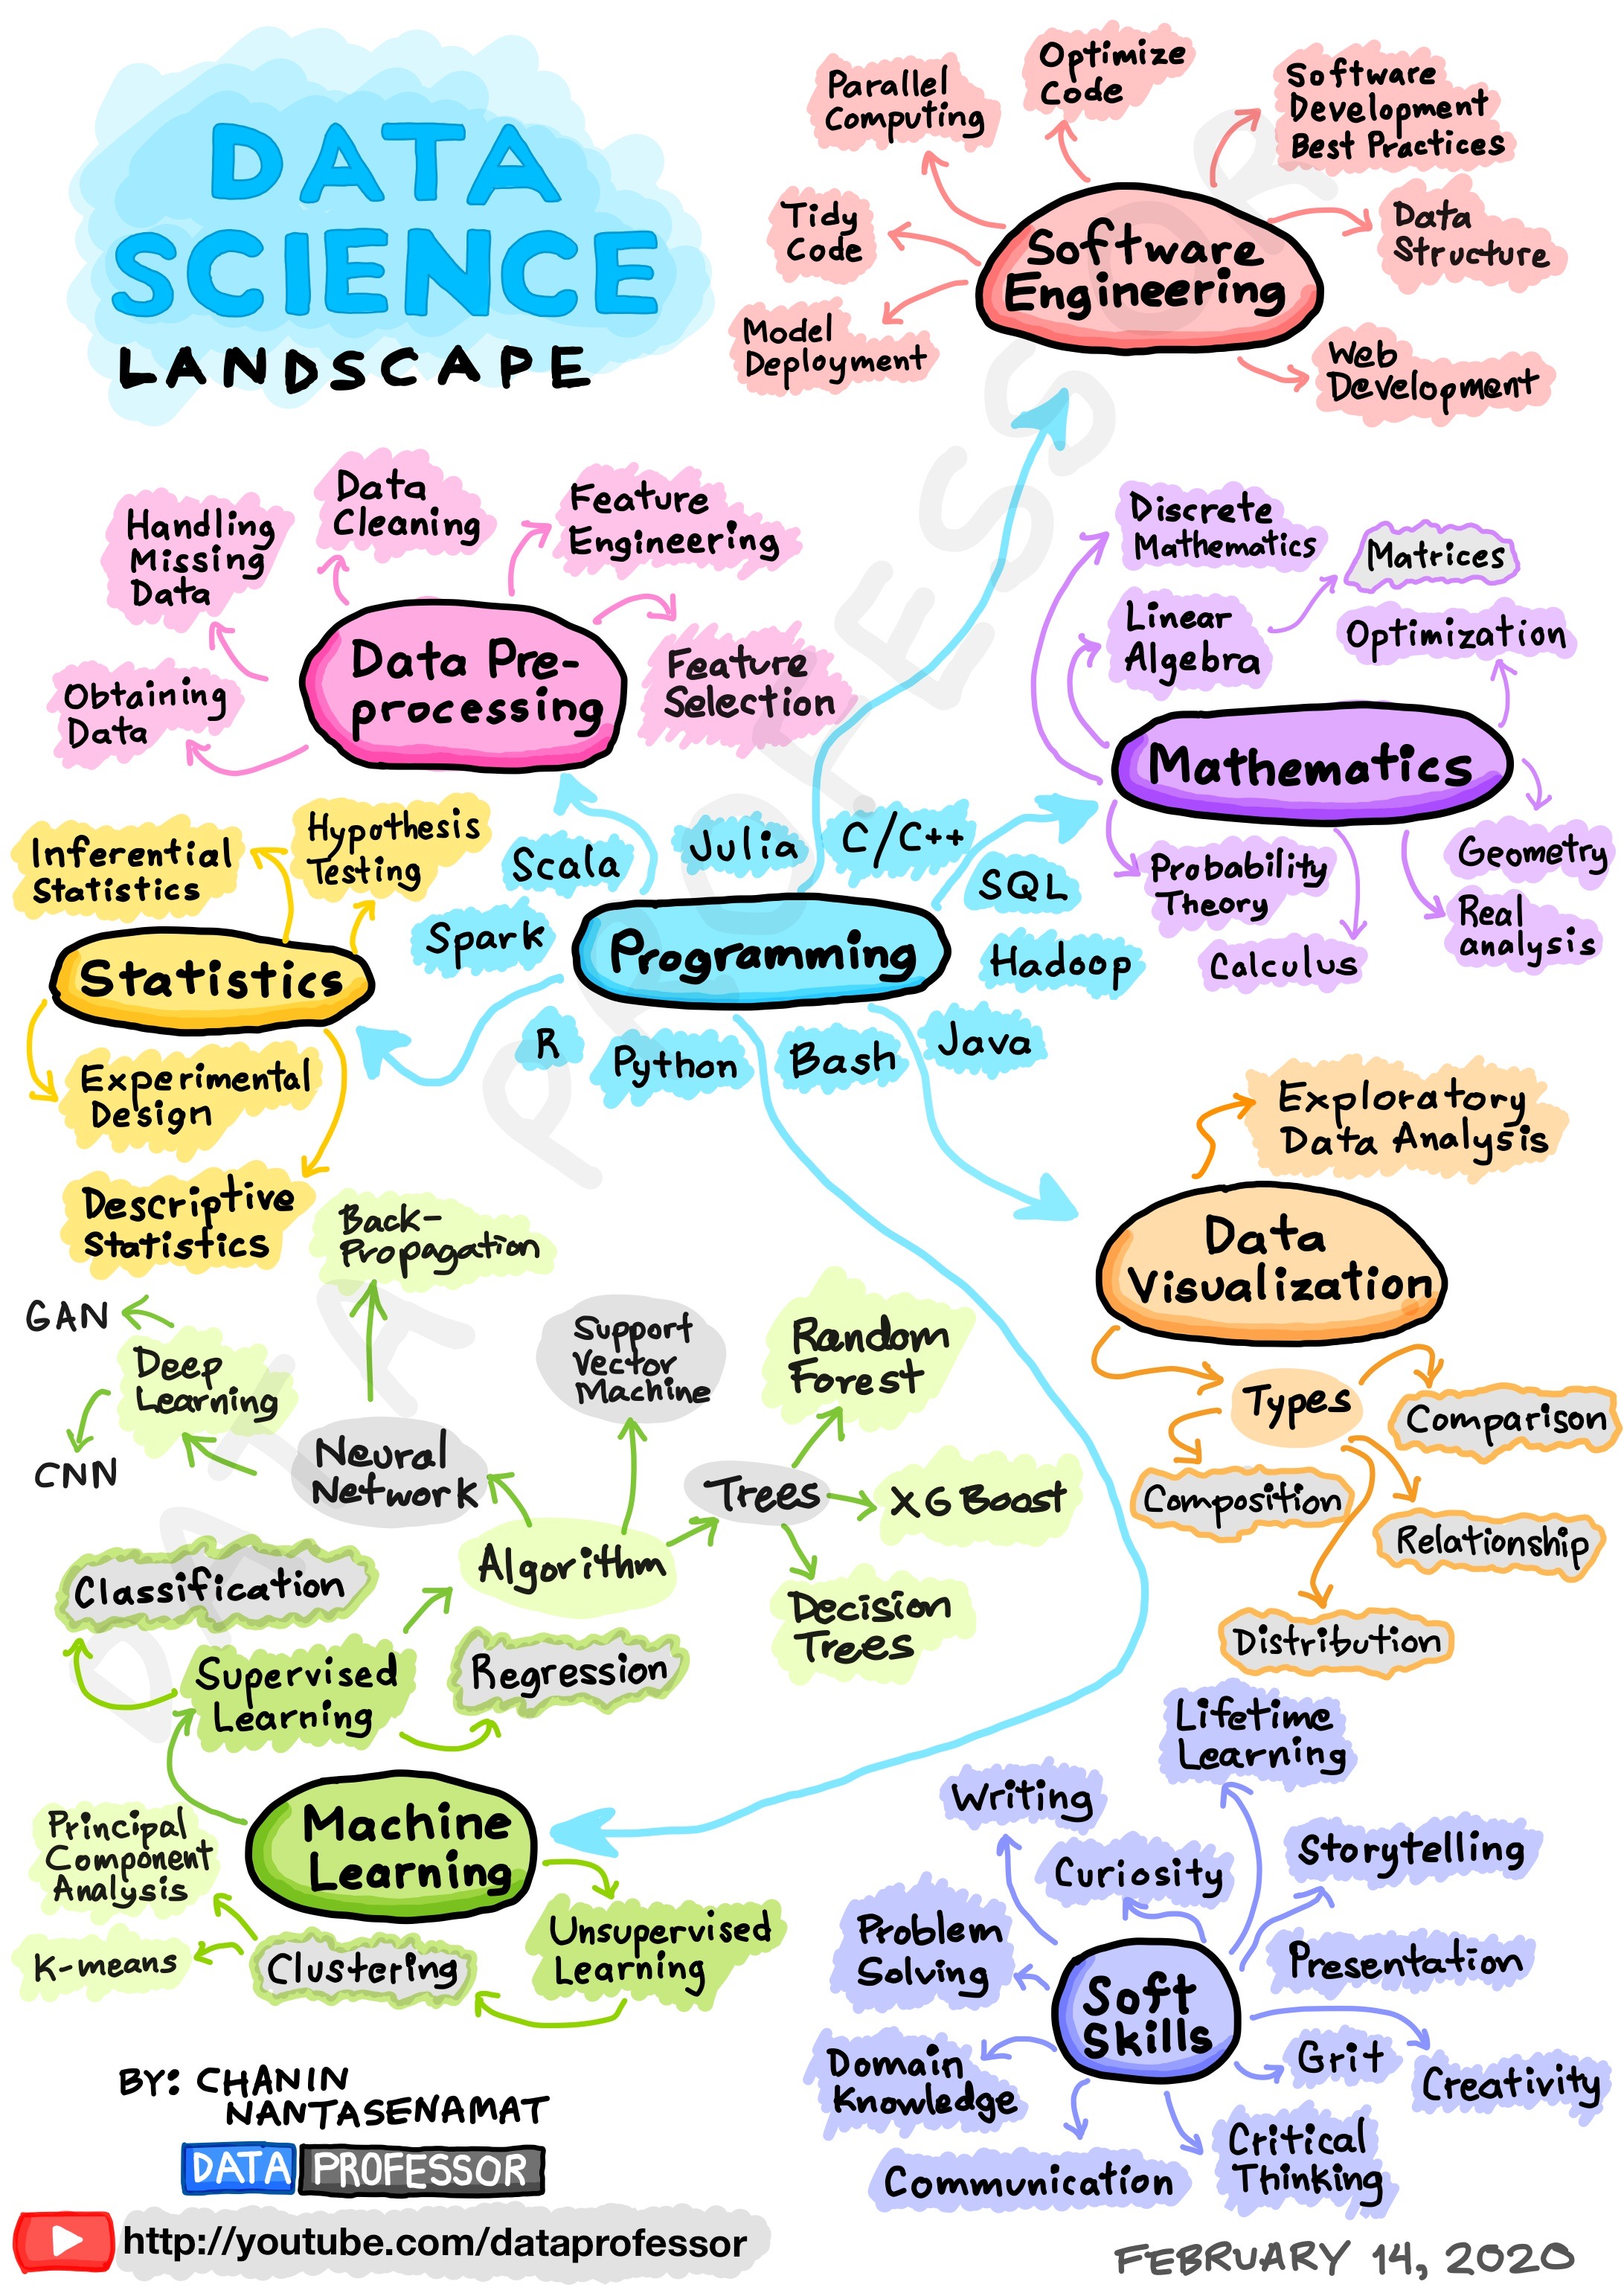

In [ ]:
from IPython.display import Image as display_image
display_image('https://upload.wikimedia.org/wikipedia/commons/1/10/Data-Science-Landscape.jpg', width=1000)

# Image processing

## Download image from web

In [ ]:
!curl -o img.jpg https://upload.wikimedia.org/wikipedia/commons/7/76/Rio_Tagus_%28ship%2C_1979%29%2C_S%C3%A8te_cf11.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M  100 24.1M    0     0  27.8M      0 --:--:-- --:--:-- --:--:-- 27.8M


## presenting an image

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

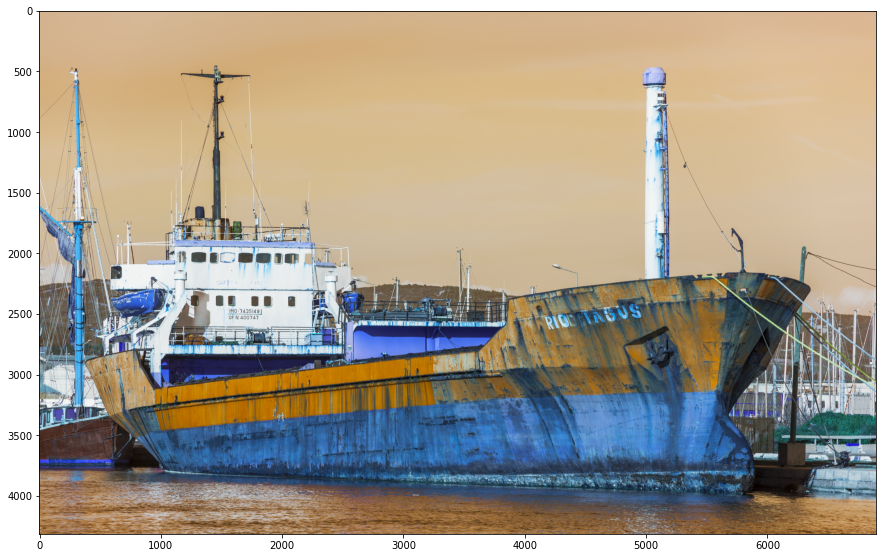

In [ ]:
# show an image using opencv
img = cv2.imread('img.jpg', cv2.IMREAD_UNCHANGED)
fig = plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

## convert image
BGR -> RGB

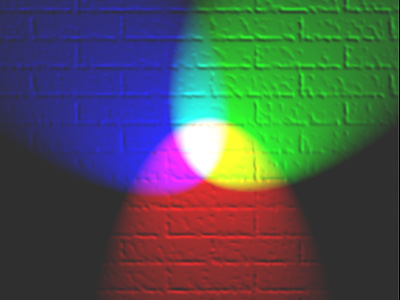

In [ ]:
display_image('https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg', width=1000)

In [ ]:
# pixel values
img[0,0,:]

array([210, 176, 140], dtype=uint8)

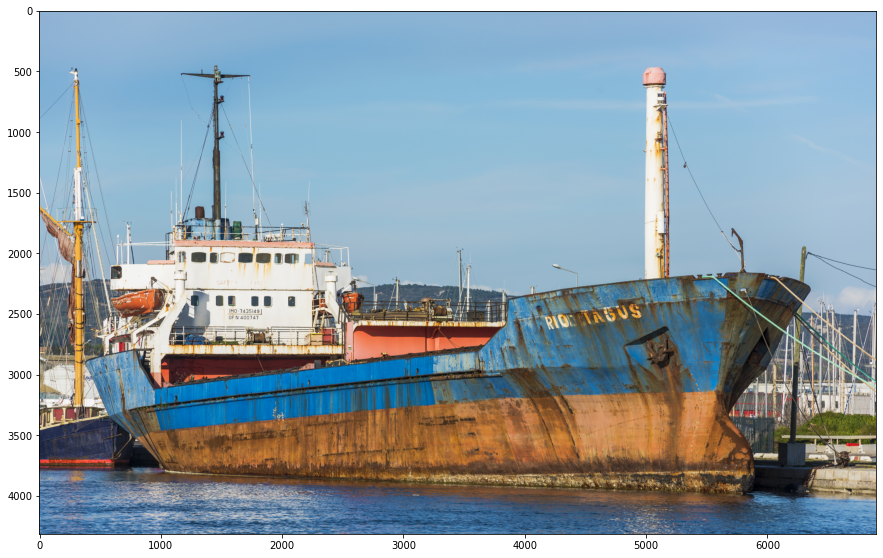

In [ ]:
# convert image from bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [ ]:
# pixel values after conversion
img[0,0,:]

array([140, 176, 210], dtype=uint8)

## crop
Select subpart of an image

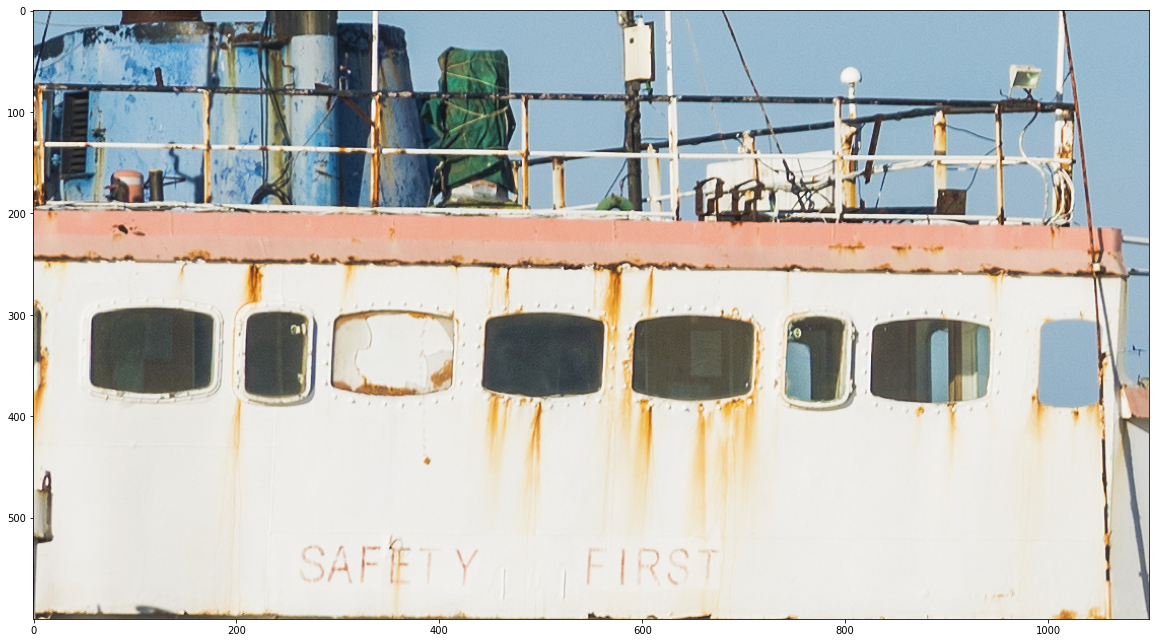

In [ ]:
# cut out a piece of the picture
img_crop = img[1700:2300, 1200:2300, :] # dwukropek - wszystkie 3 kanały
fig = plt.figure(figsize=(20,20))
plt.imshow(img_crop)
plt.show()

## contrast change

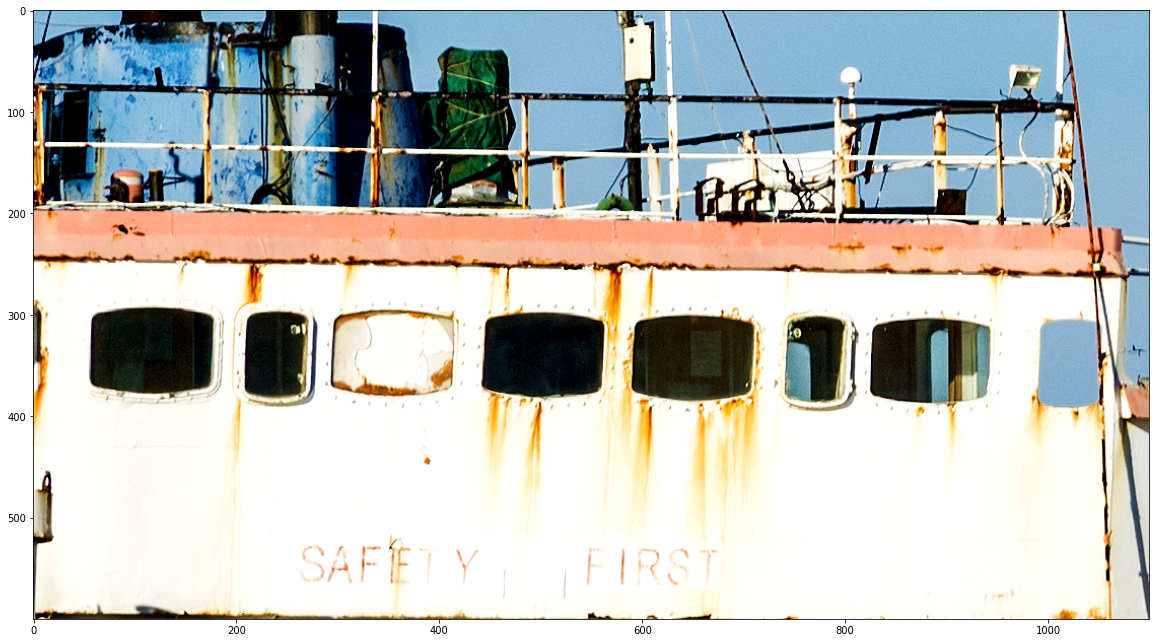

In [ ]:
# using pillow package
from PIL import Image, ImageEnhance
# convert numpy array to pillow image object
PIL_image = Image.fromarray(np.uint8(img_crop)).convert('RGB')
# image brightness enhancer by fixed factor
enhancer = ImageEnhance.Contrast(PIL_image)
factor = 1.5 # 1 to środek kontrastu
img_crop_remake = enhancer.enhance(factor)
# show results
fig = plt.figure(figsize=(20,20))
plt.imshow(np.asarray(img_crop_remake))
plt.show()

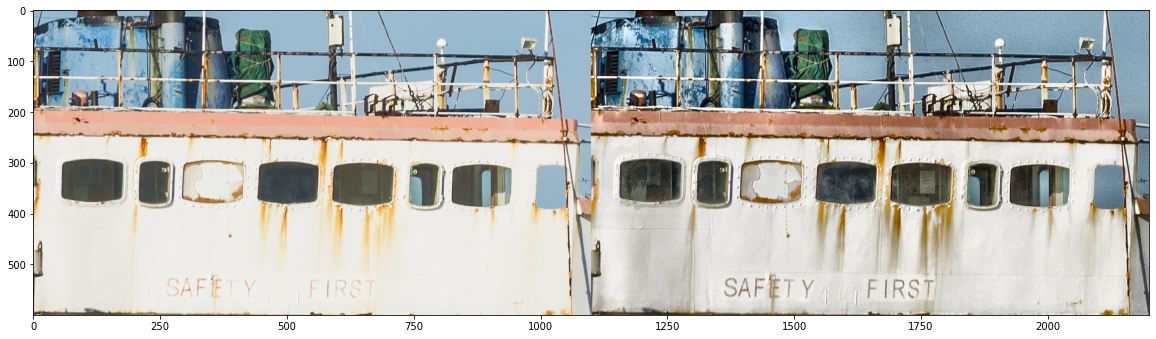

In [ ]:
# using opencv LAB color space
lab = cv2.cvtColor(img_crop, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
result = np.hstack((img_crop, enhanced_img))
fig = plt.figure(figsize=(20,20))
plt.imshow(result)
plt.show()

# Dataset

## Reading preinstalled - not used for training

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [ ]:
data.images.shape #liczba, wysokośc, szerokość, liczba kanałów

(400, 64, 64)

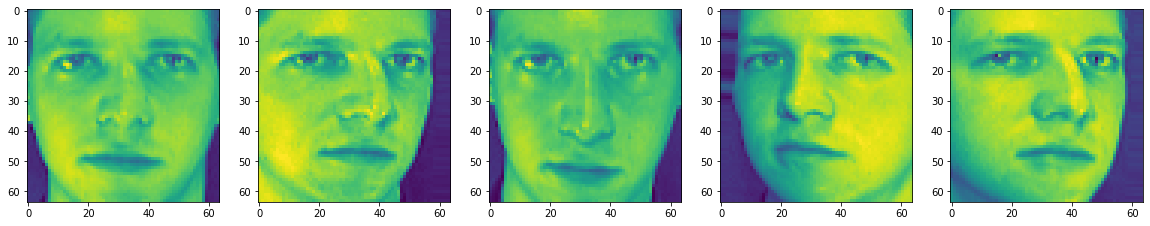

In [ ]:
num_img_to_show = 5
imgs_to_show_offset = 0
fig, ax = plt.subplots(ncols=num_img_to_show, figsize=(20,20))
for i in range(num_img_to_show):
  ax[i].imshow(data.images[imgs_to_show_offset+i])
plt.show()

## reading from GDrive

In [ ]:
!gdown 10iDfC1mnsThp40sjov5cudN0uaWN8UtP

Downloading...
From: https://drive.google.com/uc?id=10iDfC1mnsThp40sjov5cudN0uaWN8UtP
To: /content/expressions.zip
100% 27.8M/27.8M [00:00<00:00, 270MB/s]


## reading from file

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

## unpack dataset

In [ ]:
!unzip expressions.zip

In [ ]:
# change 1-channel visualization to gray scale
#plt.gray()

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

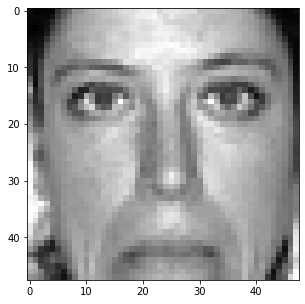

In [ ]:
# show some picture
tmp_face = cv2.imread('/content/expressions/test/disgust/PrivateTest_11895083.jpg', cv2.IMREAD_UNCHANGED)
fig = plt.figure(figsize=(5,5))
plt.imshow(tmp_face)
plt.show()

In [ ]:
# check shape of a picture
tmp_face.shape

(48, 48)

## analyse amount of samples

In [ ]:
# import package for scanning a catalog - wczytanie dużej ilości zdjęć
import glob

In [ ]:
# scan directories
files_train_disgust = glob.glob("/content/expressions/train/disgust/*.jpg")
files_train_happy = glob.glob("/content/expressions/train/happy/*.jpg")
files_train_neutral = glob.glob("/content/expressions/train/neutral/*.jpg")

In [ ]:
# show some names of files
files_train_disgust[:3]

['/content/expressions/train/disgust/Training_55875804.jpg',
 '/content/expressions/train/disgust/Training_5760281.jpg',
 '/content/expressions/train/disgust/Training_27046033.jpg']

In [ ]:
# check length of a list with files
len(files_train_happy)

7215

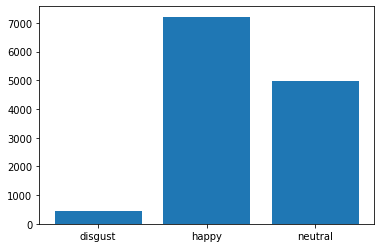

In [ ]:
# visualize how many files we have
plt.bar(
    x=["disgust", "happy", "neutral"],
    height=[len(files_train_disgust), len(files_train_happy), len(files_train_neutral)]
)
plt.show()

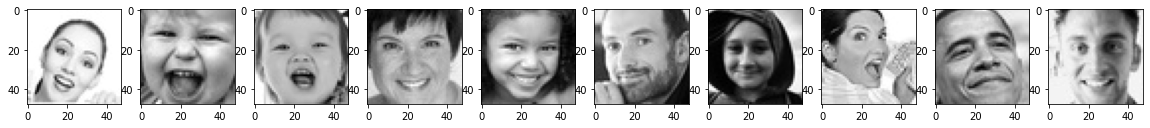

In [ ]:
# show some pictures
num_img_to_show = 10
imgs_to_show_offset = 70
fig, ax = plt.subplots(ncols=num_img_to_show, figsize=(20,20))
for i in range(num_img_to_show):
  tmp_face = cv2.imread(files_train_happy[imgs_to_show_offset+i], cv2.IMREAD_UNCHANGED)
  ax[i].imshow(tmp_face)
plt.show()

## Preparing dataset object

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train data generator from directory
train_generator = ImageDataGenerator().flow_from_directory(
    directory = "/content/expressions/train",
    target_size = (48, 48),
    batch_size = 120, #paczka którą będziemy karmić sieć, nie można dużo naraz wprowadzać
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "training"
)

Found 12616 images belonging to 3 classes.


In [ ]:
# test data generator from directory
test_generator = ImageDataGenerator().flow_from_directory(
    directory = "/content/expressions/test",
    target_size = (48, 48),
    batch_size = 120, #paczka którą będziemy karmić sieć, nie można dużo naraz wprowadzać
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "training"
)

Found 3118 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'disgust': 0, 'happy': 1, 'neutral': 2}

In [ ]:
# collect categories for later
categories = list(train_generator.class_indices.keys())
categories

['disgust', 'happy', 'neutral']

# Artificial Neural Network


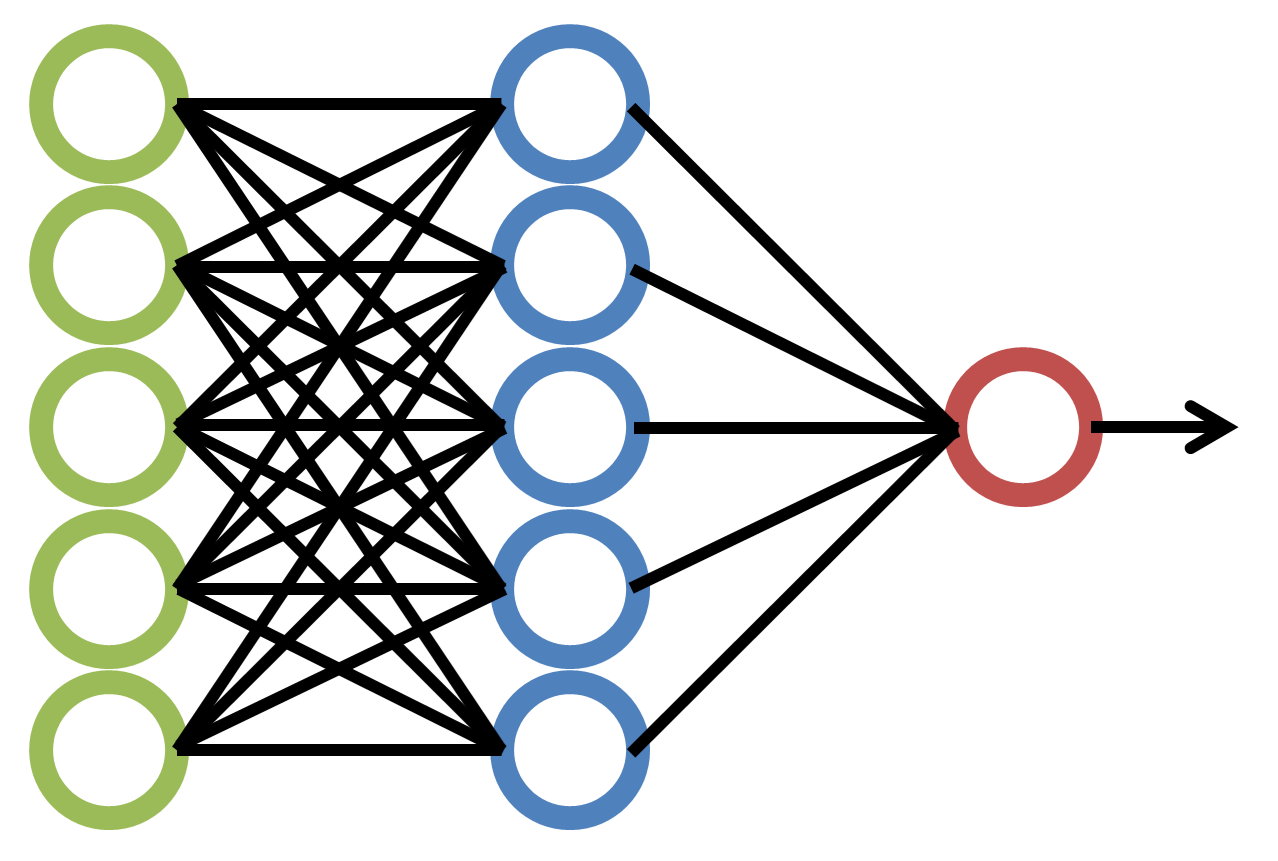

In [ ]:
display_image('https://upload.wikimedia.org/wikipedia/commons/a/a1/NeuralNetwork.png', width=1000)

In [ ]:
display_image(url='https://upload.wikimedia.org/wikipedia/commons/a/a5/Convolutional_Neural_Network_NeuralNetworkFilter.gif')

In [ ]:
display_image(url='https://upload.wikimedia.org/wikipedia/commons/f/fe/Activation_rectified_linear.svg', width=1000)

## Tensorflow model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
model = tf.keras.models.Sequential()
# conv2d requires 4-dim input data - NHWC
# the first one(N) is Number of samples, it is not visible here
# the remaining three dimensions are Height, Widht and Channels
model.add(layers.Reshape(target_shape=(48,48,1), input_shape=(48,48)))

# feature extractor
model.add(layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))

# feature extractor
model.add(layers.Conv2D(12, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))

# feature extractor
model.add(layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))

# feature extractor
model.add(layers.Conv2D(20, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))

# output layer
model.add(layers.Flatten()) 
model.add(layers.Dense(3, activation='softmax'))

# build the model
model.compile(
    optimizer = optimizers.Adam(), 
    loss='categorical_crossentropy', #błąd skonstruowany aby poradzić sobie z wieloma klasami
    metrics=['accuracy']
  )

#present how it looks
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 48, 48, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 12)        876       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 12)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)       

## Training

In [ ]:
history = model.fit(
    x=train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5


106/106 [==============================] - ETA: 0s - loss: 2.0383 - accuracy: 0.5392

106/106 [==============================] - 19s 165ms/step - loss: 2.0383 - accuracy: 0.5392 - val_loss: 0.8682 - val_accuracy: 0.5728
Epoch 2/5
106/106 [==============================] - 19s 177ms/step - loss: 0.8158 - accuracy: 0.6068 - val_loss: 0.7899 - val_accuracy: 0.6212
Epoch 3/5
106/106 [==============================] - 17s 165ms/step - loss: 0.7573 - accuracy: 0.6428 - val_loss: 0.7617 - val_accuracy: 0.6437
Epoch 4/5
106/106 [==============================] - 17s 165ms/step - loss: 0.7235 - accuracy: 0.6676 - val_loss: 0.7193 - val_accuracy: 0.6671
Epoch 5/5
106/106 [==============================] - 18s 167ms/step - loss: 0.6920 - accuracy: 0.6881 - val_loss: 0.7044 - val_accuracy: 0.6770


In [ ]:
# what remains after the training
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

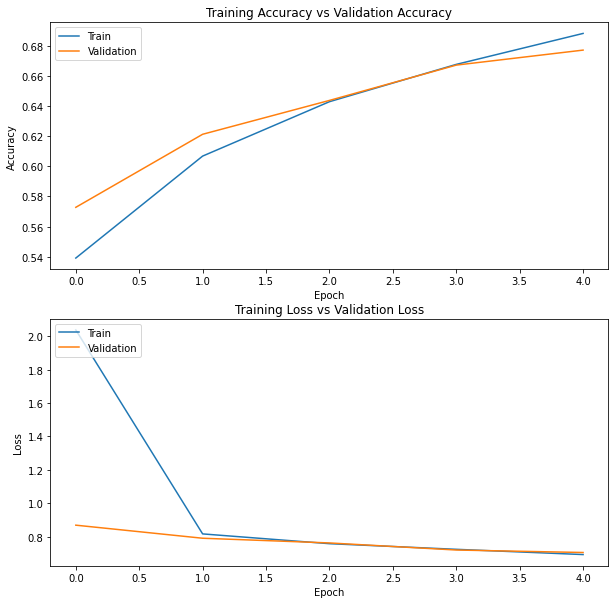

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Testing with real face images

## gather photo from web camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


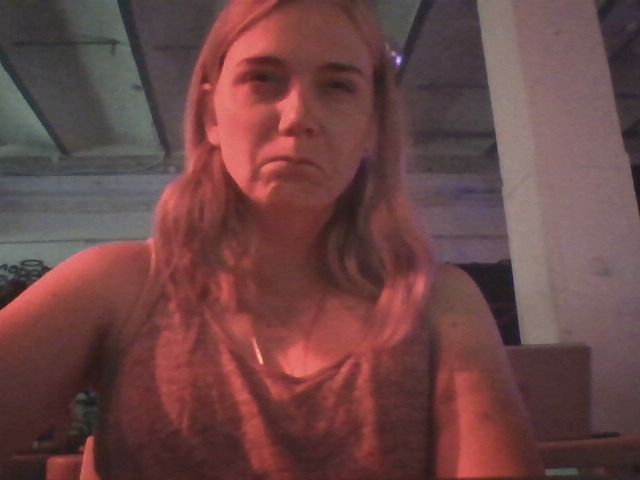

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## prepare photo for prediction

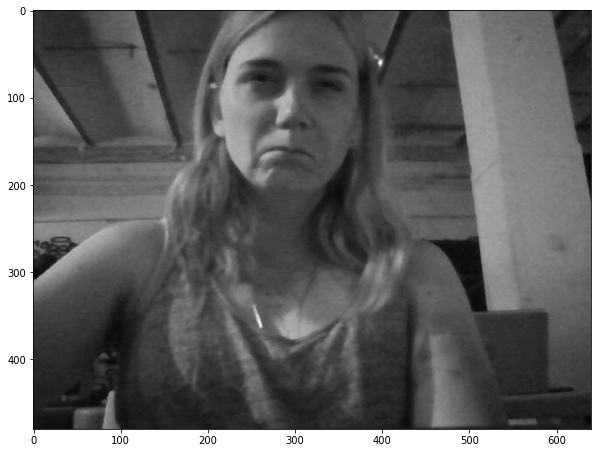

In [ ]:
tmp_face = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
tmp_face = cv2.cvtColor(tmp_face, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10,10))
plt.imshow(tmp_face)
plt.show()

In [ ]:
h,w = tmp_face.shape
h,w

(480, 640)

In [ ]:
# lets check where to cut the picture
margin_size = int((w-h)/2)
margin_size

80

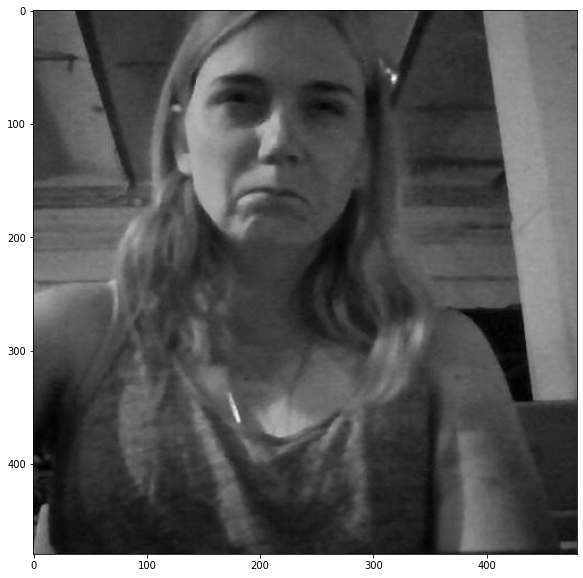

In [ ]:
# cut it!
fig = plt.figure(figsize=(10,10))
plt.imshow(tmp_face[:,margin_size:-margin_size])
plt.show()

In [ ]:
# present resized sample
tmp_face_resized = cv2.resize(tmp_face[:,margin_size:-margin_size], 48, 48) ####
fig = plt.figure(figsize=(10,10))
plt.imshow(tmp_face_resized)
plt.show()

error: ignored

## predict category

In [ ]:
# make prediction on one sample
# we need to force 3rd dim with reshape
tmp_output = model.predict(tmp_face_resized.reshape(1, 48, 48))
tmp_output

In [ ]:
# check what category is most propable
np.argmax(tmp_output)

In [ ]:
categories

In [ ]:
# the name of predicted category
categories[np.argmax(tmp_output)]

## merge all into function

In [ ]:
def check_expression(file_path):
  # read image
  
  # convert to gray scale
  
  #check margin
  
  # resize to small square
  
  # predict expressions
  
  return ?

In [ ]:
check_expression("?")

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  print(?)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Want more?

## DALL-E 2 Image generation
"Teddy bears working on new AI research underwater with 1990s technology"

In [ ]:
display_image('https://upload.wikimedia.org/wikipedia/commons/4/41/DALL-E_2_artificial_intelligence_digital_image_generated_photo.jpg', width=1000)

## Style Transfer

In [ ]:
display_image('https://developer-blogs.nvidia.com/wp-content/uploads/2018/08/Linear-Style-Transfer-featured.png', width=1000)

In [ ]:
display_image('https://developer-blogs.nvidia.com/wp-content/uploads/2018/08/Linear-Style-Transfer-2.png', width=1000)

In [ ]:
display_image('https://developer-blogs.nvidia.com/wp-content/uploads/2018/08/Linear-Style-Transfer-6.png', width=1000)

## object detection
[labels](https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_label_map.pbtxt)

In [ ]:
import tensorflow_hub as hub
# Apply image detector on a batch of image.
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [ ]:
tmp_face = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
tmp_face = cv2.cvtColor(tmp_face, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(tmp_face)
plt.show()

In [ ]:
boxes, scores, classes, num_detections = detector([tmp_face])

In [ ]:
boxes[scores>0.5].numpy()

In [ ]:
box_cor = boxes.numpy()[0,0].astype(np.int32)
box_cor

In [ ]:
# represents the top left corner of rectangle
start_point = tuple(box_cor[:2])
  
# represents the bottom right corner of rectangle
end_point = tuple(box_cor[2:])
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 4
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
tmp_face_rect = cv2.rectangle(tmp_face, start_point, end_point, color, thickness)
  
# Displaying the image 
plt.imshow(tmp_face_rect)
plt.show()

In [ ]:
boxes, scores, classes = boxes.numpy().reshape(100,-1).astype(np.int32), scores.numpy().reshape(100), classes.numpy().reshape(100)

In [ ]:
score_filter = scores>0.5
category_filter = classes==1

In [ ]:
boxes_to_show = boxes[score_filter & category_filter]

In [ ]:
tmp_face_rect = tmp_face.copy()
for b in boxes_to_show:
  print(b)
  tmp_face_rect = cv2.rectangle(tmp_face_rect, tuple(b[:2]), tuple(b[2:]), color, thickness)

In [ ]:
plt.imshow(tmp_face_rect)
plt.show()

In [ ]:
def detect_people(img, propability):
  #detection
  boxes, scores, classes, num_detections = detector([img])
  #convert to numpy
  boxes, scores, classes = boxes.numpy().reshape(100,-1).astype(np.int32), scores.numpy().reshape(100), classes.numpy().reshape(100)
  #filter most propable results
  score_filter = scores>propability
  category_filter = classes==1
  boxes_to_show = boxes[score_filter & category_filter]
  #draw rectangles
  tmp_to_draw = img.copy()
  for b in boxes_to_show:
    tmp_to_draw = cv2.rectangle(tmp_to_draw, tuple(b[:2]), tuple(b[2:]), color, thickness)
  
  return tmp_to_draw

In [ ]:
tmp_to_draw = detect_people(tmp_face, 0.01)
plt.imshow(tmp_to_draw)
plt.show()

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  tmp_img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
  tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
  tmp_img = detect_people(tmp_img, 0.1)
  tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_RGB2BGR)
  cv2.imwrite('photo.jpg', tmp_img)

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Sources

*   https://www.kaggle.com/datasets/msambare/fer2013/code?datasetId=786787&sortBy=voteCount
*   https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
*   https://www.kaggle.com/code/aayushmishra1512/emotion-detector
*   https://www.kaggle.com/general/156610
*   https://playground.tensorflow.org/
*   https://paperswithcode.com/paper/facial-motion-prior-networks-for-facial
*   https://commons.wikimedia.org/wiki/Main_Page
*   https://developer.nvidia.com/blog/new-ai-style-transfer-algorithm-allows-users-to-create-millions-of-artistic-combinations/
*   https://towardsdatascience.com/art-with-ai-turning-photographs-into-artwork-with-neural-style-transfer-8144ece44bed
*   https://goart.fotor.com/

